# 1.라이브러리 및 데이터셋 불러오기

In [61]:
import pandas as pd
# # 컬럼 전체 보기
# pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # 윈도우 기본 한글 폰트
plt.rc('axes', unicode_minus=False)     # 마이너스 부호 깨짐 방지

In [62]:
df = pd.read_excel('dataset.xlsx')

# EDA 및 전처리

In [63]:
df.head()

,track_id,title,artist,duration,main_genres,sub_genres,releaseDate,explicit,acousticness,danceability,...,key,liveness,loudness,mode,speechiness,tempo,timeSignature,valence,popularity,status
0,1TwN15RFItXAF4b32d8TVU,",",Dasutt,255,인디,락/메탈,2020-03-07T00:00:00+00:00,False,0.36,0.32,...,8,0.12,-3.73,0,0.05,131.62,4,0.15,29,relax
1,6FqOUCihYYu3OisVBpoEp3,007 (feat. Syd),"Syd, Tabber",205,알앤비/소울,랩/힙합,2022-09-21T00:00:00+00:00,True,0.18,0.63,...,10,0.34,-8.13,0,0.12,148.68,4,0.88,50,relax
2,3Jzu2CpFC6zki3PjDwppR9,10 Years Ago,FKJ,200,팝,NaN,2019-11-12T00:00:00+00:00,False,0.59,0.54,...,2,0.13,-11.87,0,0.07,80.00,4,0.22,47,reading
3,34B8hkeah9EcOTvIvACJxL,100 Roses,FKJ,248,팝,NaN,2019-11-12T00:00:00+00:00,False,0.75,0.61,...,4,0.31,-10.00,0,0.07,82.97,4,0.20,42,reading
4,36PxJOUB8qFTcDFp2M0h6K,2 O' CLOCK,dori,152,알앤비/소울,NaN,2022-02-01T00:00:00+00:00,False,0.67,0.82,...,9,0.10,-5.56,1,0.05,92.04,4,0.74,55,drive


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          648 non-null    object 
 1   title             648 non-null    object 
 2   artist            648 non-null    object 
 3   duration          648 non-null    int64  
 4   main_genres       648 non-null    object 
 5   sub_genres        224 non-null    object 
 6   releaseDate       637 non-null    object 
 7   explicit          648 non-null    bool   
 8   acousticness      648 non-null    float64
 9   danceability      648 non-null    float64
 10  energy            648 non-null    float64
 11  instrumentalness  648 non-null    float64
 12  key               648 non-null    int64  
 13  liveness          648 non-null    float64
 14  loudness          648 non-null    float64
 15  mode              648 non-null    int64  
 16  speechiness       648 non-null    float64
 1

## 결측치 처리

In [84]:
df_clean = df.copy()

In [87]:
# releaseDate(발매일) 결측치 확인
display(df_clean[df_clean['releaseDate'].isnull()])

,track_id,title,artist,duration,main_genres,sub_genres,releaseDate,explicit,acousticness,danceability,...,key,liveness,loudness,mode,speechiness,tempo,timeSignature,valence,popularity,status


In [ ]:
# releaseDate(발매일) 결측치 수기 입력

df_clean.loc[df_clean['track_id'] == '7vfelczXTFsndAqC8R8BEN', 'releaseDate'] = '2019-01-19'
df_clean.loc[df_clean['track_id'] == '7LLnHEOcFGPd0ACRIE6CtP', 'releaseDate'] = '2022-02-14'
df_clean.loc[df_clean['track_id'] == '69bIyhMJzx8kC7QnItmvma', 'releaseDate'] = '2021-04-21'
df_clean.loc[df_clean['track_id'] == '4tYDNYCQaW1oXKPzBjB4Id', 'releaseDate'] = '2021-03-07'
df_clean.loc[df_clean['track_id'] == '3EGRNeIXtLH7CqIbe1SM2Q', 'releaseDate'] = '2014-03-19'
df_clean.loc[df_clean['track_id'] == '6Z6IBsPsIF9nHEUNVHRtQF', 'releaseDate'] = '2022-01-23'
df_clean.loc[df_clean['track_id'] == '0zjKN5o5xwg1LqwJtLRDX5', 'releaseDate'] = '2000-11-30'
df_clean.loc[df_clean['track_id'] == '2AR5Pc2833LrxFagCP9AuA', 'releaseDate'] = '2022-12-01'
df_clean.loc[df_clean['track_id'] == '3iri0GQnLArkvz8VACuMRg', 'releaseDate'] = '2015-11-27'
df_clean.loc[df_clean['track_id'] == '4twllsTUoTAFxiVeq3bNjq', 'releaseDate'] = '2017-04-21'
df_clean.loc[df_clean['track_id'] == '3LC2XvIgfPpJChlceA82qU', 'releaseDate'] = '2014-12-16'


### 서브 장르 결측치 처리


In [69]:
# sub_genres(장르) 결측치는 main_genres(대장르)로 대체
df_clean['sub_genres'] = np.where(df_clean['sub_genres'].isnull(), df_clean['main_genres'], df_clean['sub_genres'])

In [70]:
df_clean

,track_id,title,artist,duration,main_genres,sub_genres,releaseDate,explicit,acousticness,danceability,...,key,liveness,loudness,mode,speechiness,tempo,timeSignature,valence,popularity,status
0,1TwN15RFItXAF4b32d8TVU,",",Dasutt,255,인디,락/메탈,2020-03-07,False,0.36,0.32,...,8,0.12,-3.73,0,0.05,131.62,4,0.15,29,relax
1,6FqOUCihYYu3OisVBpoEp3,007 (feat. Syd),"Syd, Tabber",205,알앤비/소울,랩/힙합,2022-09-21,True,0.18,0.63,...,10,0.34,-8.13,0,0.12,148.68,4,0.88,50,relax
2,3Jzu2CpFC6zki3PjDwppR9,10 Years Ago,FKJ,200,팝,팝,2019-11-12,False,0.59,0.54,...,2,0.13,-11.87,0,0.07,80.00,4,0.22,47,reading
3,34B8hkeah9EcOTvIvACJxL,100 Roses,FKJ,248,팝,팝,2019-11-12,False,0.75,0.61,...,4,0.31,-10.00,0,0.07,82.97,4,0.20,42,reading
4,36PxJOUB8qFTcDFp2M0h6K,2 O' CLOCK,dori,152,알앤비/소울,알앤비/소울,2022-02-01,False,0.67,0.82,...,9,0.10,-5.56,1,0.05,92.04,4,0.74,55,drive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,0qMip0B2D4ePEjBJvAtYre,紅蓮華,LiSA,237,팝,J-POP,2019-04-22,False,0.00,0.54,...,4,0.08,-2.83,0,0.16,134.94,4,0.26,74,work out
644,1BdkZl14xg3di2xuIq9Sz3,활주 - Live,BUZZ,215,OST,OST,2006-12-19,False,0.01,0.16,...,1,0.66,-2.30,0,0.17,164.09,4,0.22,4,work out
645,2vH8JFJKfkAgZs1GFlOzGh,暁の鎮魂歌,Linked Horizon,240,J-POP,OST,2018-09-19,False,0.40,0.50,...,2,0.37,-6.29,0,0.04,136.90,3,0.30,56,work out
646,1Efu6h1TIH3PovH3Kj9byr,휴가철 도로 위 Vacation Freeway,Yun DDan DDan,194,포크/어쿠스틱,인디,2017-06-05,False,0.55,0.62,...,10,0.22,-5.27,1,0.04,89.03,4,0.63,0,drive


# 곡 길이 0인경우 처리

In [71]:
print('곡 길이 통계치 : ')
display(df_clean['duration'].describe())

print('곡 길이 0인 데이터 : ')
display(df_clean[df_clean['duration'] == 0])

곡 길이 통계치 : 


count    648.000000
mean     207.180556
std       58.745829
min        0.000000
25%      180.750000
50%      207.000000
75%      236.250000
max      436.000000
Name: duration, dtype: float64

곡 길이 0인 데이터 : 


,track_id,title,artist,duration,main_genres,sub_genres,releaseDate,explicit,acousticness,danceability,...,key,liveness,loudness,mode,speechiness,tempo,timeSignature,valence,popularity,status
55,5cQ9mS0qDlh4YPRQZBHhBm,Between Earth and Sky,Choi Yuree,0,발라드,발라드,2025-10-23,False,0.81,0.34,...,10,0.33,-7.46,1,0.03,187.12,4,0.26,40,drive
126,6fr1TUsmAtSzvTjISYoEiC,Doa,Li Hott,0,락,락,2025-06-21,True,0.03,0.64,...,7,0.12,-8.83,1,0.32,175.07,4,0.50,5,work out
229,1RG1aEW6QnorfN5Iw1802o,I Do Not Bid Farewell,Mingginyu,0,포크/어쿠스틱,인디,2022-09-08,False,0.92,0.54,...,5,0.07,-17.82,1,0.03,55.74,4,0.20,18,relax
266,6Hfxv0Cu2yLPVeTHgoDAK5,KNIVES,"Savage Ga$p, Neoni",0,락,락,2023-11-17,True,0.01,0.44,...,4,0.15,-4.63,0,0.07,148.18,4,0.39,51,work out
358,0tSDqQOK8EgoRxYXWkP5rR,NOT OK (Feat. MINNIE),"LOCO, MINNIE ((G)I-DLE)",0,랩/힙합,랩/힙합,2023-10-17,False,0.34,0.75,...,4,0.29,-8.03,1,0.05,133.02,4,0.41,39,relax
376,00x6bVmgpINfHaxUQWv2OY,OUTTA SPACE,"Sik-K, haon, JMIN",0,랩/힙합,랩/힙합,2025-08-08,False,0.01,0.80,...,1,0.10,-6.17,1,0.06,134.06,4,0.70,45,work out
387,6Vktb6PXtCDK363GxI33Vi,Play with Me,"Meloh, OSung",0,알앤비/소울,알앤비/소울,2020-06-15,False,0.43,0.57,...,11,0.11,-6.71,1,0.05,81.94,4,0.68,41,relax
501,5gJDZX6d3n4C8t2tk9UPoo,The Score,Duhart,0,랩/힙합,랩/힙합,2017-12-25,True,0.01,0.82,...,11,0.15,-7.73,0,0.22,136.33,3,0.07,0,work out
544,4RfzAQ5iQlNJEguhEhiXtS,Wake Up,Kowloon,0,일렉트로닉,팝,2021-07-01,False,0.29,0.83,...,5,0.11,-9.11,0,0.04,105.04,4,0.67,58,drive
576,1t4brrmAIeYghJ3QAAF5Ri,YOU,Lacuna 라쿠나,0,인디,락/메탈,2022-02-24,False,0.42,0.47,...,8,0.15,-4.37,1,0.04,110.03,4,0.35,33,relax


In [72]:
# 0인 곡 길이(duration) 결측치 수기 입력

df_clean.loc[df_clean['track_id'] == '5cQ9mS0qDlh4YPRQZBHhBm', 'duration'] = 265
df_clean.loc[df_clean['track_id'] == '6fr1TUsmAtSzvTjISYoEiC', 'duration'] = 121
df_clean.loc[df_clean['track_id'] == '1RG1aEW6QnorfN5Iw1802o', 'duration'] = 202
df_clean.loc[df_clean['track_id'] == '6Hfxv0Cu2yLPVeTHgoDAK5', 'duration'] = 171
df_clean.loc[df_clean['track_id'] == '0tSDqQOK8EgoRxYXWkP5rR', 'duration'] = 197
df_clean.loc[df_clean['track_id'] == '00x6bVmgpINfHaxUQWv2OY', 'duration'] = 191
df_clean.loc[df_clean['track_id'] == '6Vktb6PXtCDK363GxI33Vi', 'duration'] = 154
df_clean.loc[df_clean['track_id'] == '5gJDZX6d3n4C8t2tk9UPoo', 'duration'] = 192
df_clean.loc[df_clean['track_id'] == '4RfzAQ5iQlNJEguhEhiXtS', 'duration'] = 239
df_clean.loc[df_clean['track_id'] == '1t4brrmAIeYghJ3QAAF5Ri', 'duration'] = 214

df_clean.loc[df_clean['track_id'] == '78bKg3Kp3UvZeurVrS1ACo', 'duration'] = 250
df_clean.loc[df_clean['track_id'] == '2AR5Pc2833LrxFagCP9AuA', 'duration'] = 197
df_clean.loc[df_clean['track_id'] == '31Ykzg9flyr2iOl8NXT6Gm', 'duration'] = 212
df_clean.loc[df_clean['track_id'] == '3RbRTEloMZ6VNTJYhHNCZU', 'duration'] = 227
df_clean.loc[df_clean['track_id'] == '2ANSu81jXVRic0whEnEtE5', 'duration'] = 267
df_clean.loc[df_clean['track_id'] == '67iw423uGUEPAMQKeLf8a2', 'duration'] = 190
df_clean.loc[df_clean['track_id'] == '0ygUYVko1ByShGff2oUTmm', 'duration'] = 214
df_clean.loc[df_clean['track_id'] == '3LC2XvIgfPpJChlceA82qU', 'duration'] = 263

## 청취 상황별 분포 확인

In [73]:
df_drive = df_clean[df_clean['status']=='drive']
df_reading = df_clean[df_clean['status']=='reading']
df_relax = df_clean[df_clean['status']=='relax']
df_workout = df_clean[df_clean['status']=='work out']

C:\Users\김준석\AppData\Local\Temp\ipykernel_29028\1252954286.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\김준석\AppData\Local\Temp\ipykernel_29028\1252954286.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\김준석\AppData\Local\Temp\ipykernel_29028\1252954286.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\김준석\AppData\Local\Temp\ipykernel_29028\1252954286.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels

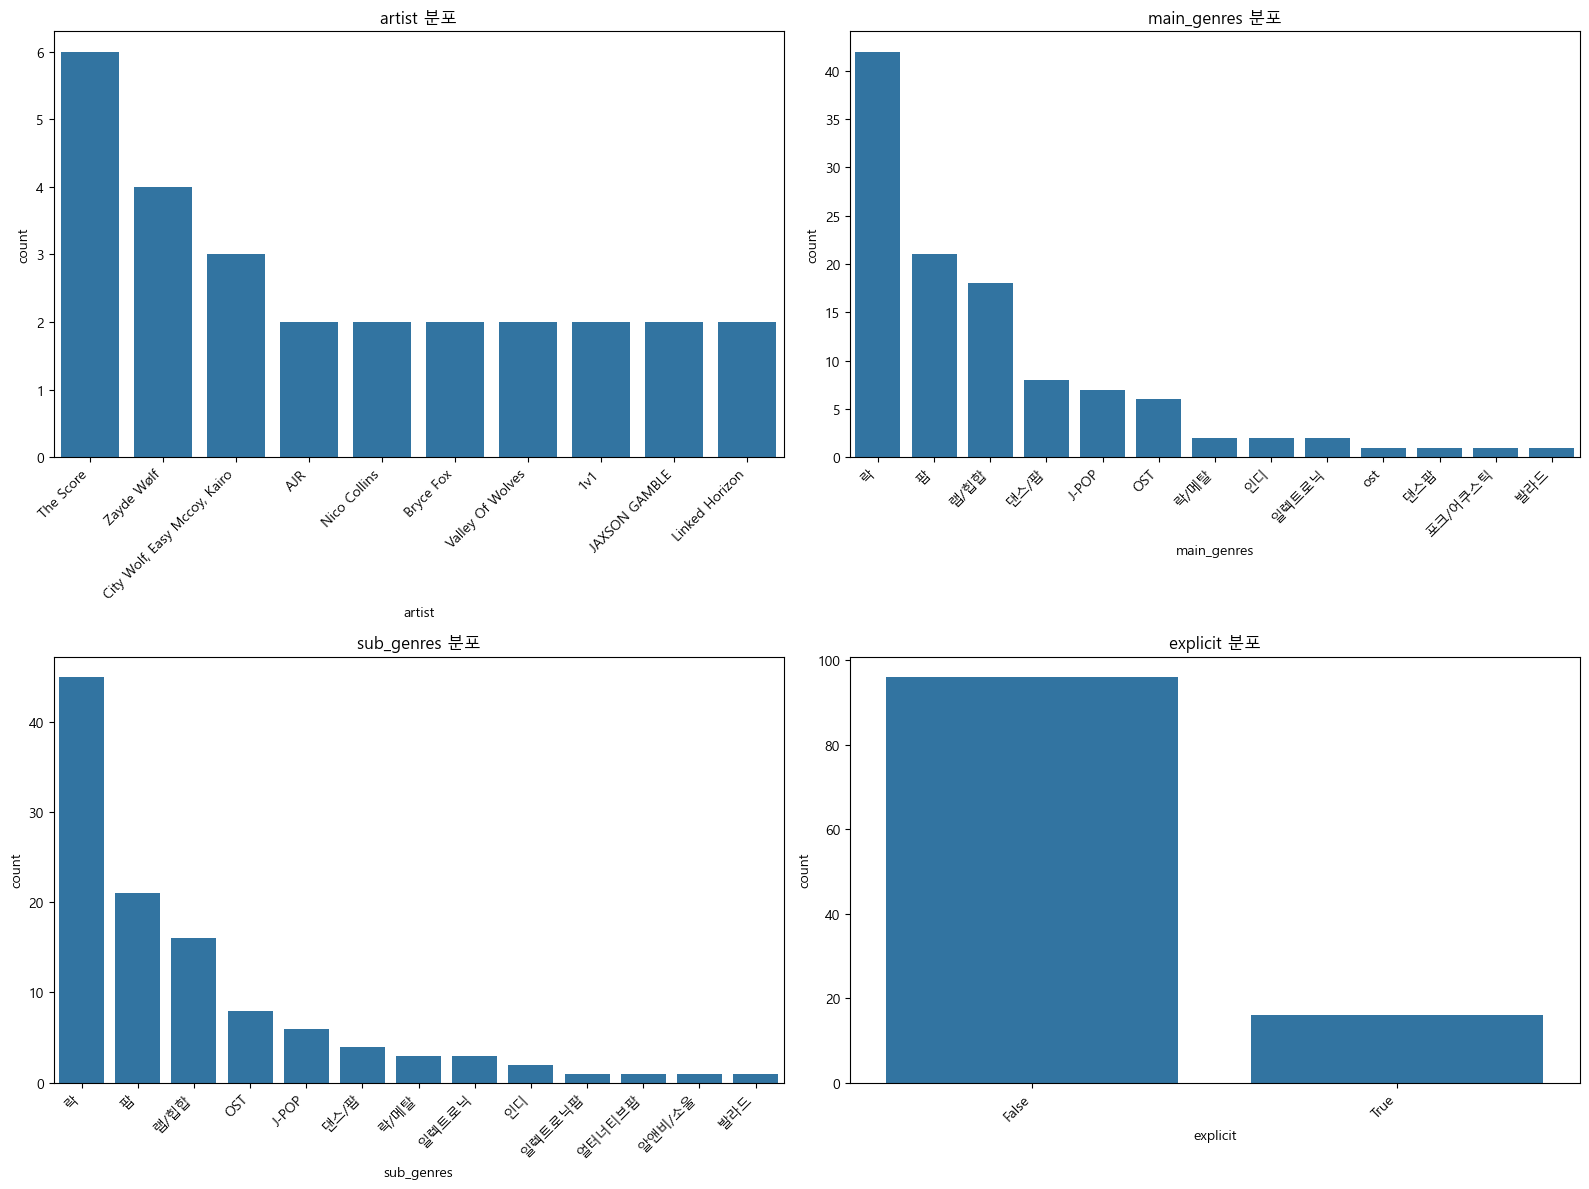

In [74]:
# 범주형 변수 분포 시각화
categorical_cols = ['artist', 'main_genres', 'sub_genres', 'explicit']

#메인 상황 
status = df_workout

# subplot 설정
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    
    # artist는 Top 10만 표시
    if col == "artist":
        top10 = status[col].value_counts().nlargest(10).index
        plot_data = status[status[col].isin(top10)]
        order = top10
    else:
        plot_data = status
        order = status[col].value_counts().index
    
    sns.countplot(data=plot_data, x=col, order=order, ax=ax)
    ax.set_title(f'{col} 분포')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


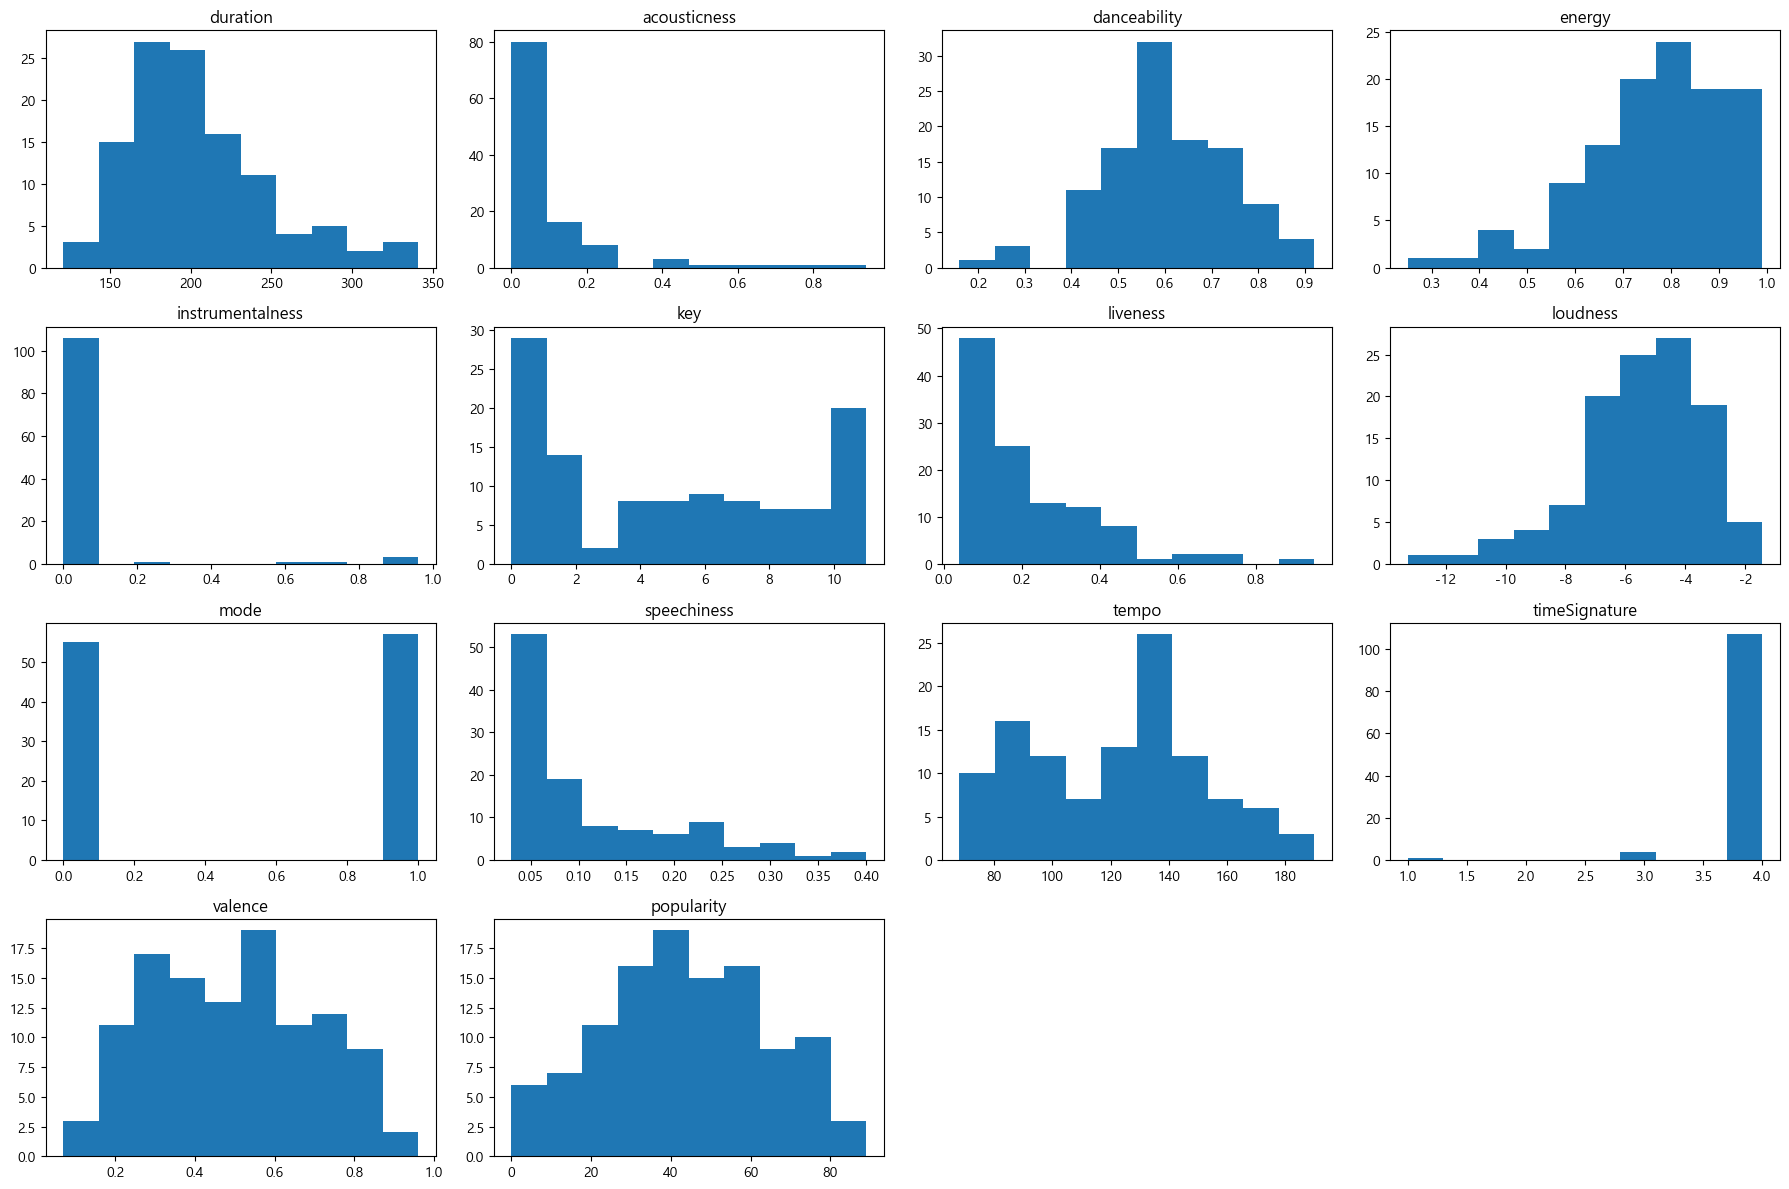

In [75]:
# 수치형 변수 분포 시각화
# df_drive = df_clean[df_clean['status']=='drive']
# df_reading = df_clean[df_clean['status']=='reading']
# df_relax = df_clean[df_clean['status']=='relax']
# df_workout = df_clean[df_clean['status']=='work out']

#메인 상황 
status = df_workout

numerical_cols = ['duration', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'timeSignature', 'valence', 'popularity']

# subplot 크기 설정
n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # 자동 행 계산

plt.figure(figsize=(18, n_rows * 3))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(status[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

# 전처리 완료 저장

In [77]:
df_clean.to_csv('dataset_clean.csv',encoding='utf-8-sig',index=False)